# (15) Simulation -- draft

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from analysis.opticflow import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def _show1(absolute=False):
    fig, axes = create_figure(2, 4, (13.3, 5.5), 'all', 'all', constrained_layout=True)

    im = axes[0, 0].imshow(np.abs(alpha_dot[..., 0]) if absolute else alpha_dot[..., 0])
    axes[0, 0].set_title(r'$\dot{\alpha}_x$', fontsize=20)
    plt.colorbar(im, ax=axes[0, 0])

    im = axes[0, 1].imshow(np.abs(alpha_dot[..., 1]) if absolute else alpha_dot[..., 1])
    axes[0, 1].set_title(r'$\dot{\alpha}_y$', fontsize=20)
    plt.colorbar(im, ax=axes[0, 1])

    im = axes[0, 2].imshow(np.abs(rho_dot) if absolute else rho_dot)
    axes[0, 2].set_title(r'$\dot{\rho}$', fontsize=20)
    plt.colorbar(im, ax=axes[0, 2])

    im = axes[0, 3].imshow(np.abs(phi_dot) if absolute else phi_dot)
    axes[0, 3].set_title(r'$\dot{\phi}$', fontsize=20)
    plt.colorbar(im, ax=axes[0, 3])

    im = axes[1, 0].imshow(np.abs(arc_x) if absolute else arc_x)
    axes[1, 0].set_title(r'$arc_x$', fontsize=20)
    plt.colorbar(im, ax=axes[1, 0])

    im = axes[1, 1].imshow(np.abs(arc_y) if absolute else arc_y)
    axes[1, 1].set_title(r'$arc_y$', fontsize=20)
    plt.colorbar(im, ax=axes[1, 1])

    im = axes[1, 2].imshow(np.abs(rho) if absolute else rho)
    axes[1, 2].set_title(r'$\rho$', fontsize=20)
    plt.colorbar(im, ax=axes[1, 2])

    im = axes[1, 3].imshow(np.abs(phi) if absolute else phi)
    axes[1, 3].set_title(r'$\phi$', fontsize=20)
    plt.colorbar(im, ax=axes[1, 3])

    axes.flat[-1].invert_yaxis()
    plt.show()

## Initial

In [2]:
x0 = 10
y0 = 0
z = 30
delta = 15

In [3]:
theta_1 = np.rad2deg(np.arctan(delta / z / (1 + (x0 * (x0 - delta) / z**2))))
theta_2 = np.rad2deg(np.arctan(delta / z / (1 + (x0 * (x0 + delta) / z**2))))

theta_1, theta_2

(27.89727103094763, 21.370622269343183)

In [4]:
w = 500

x0 = 10
y0 = 0

x = 20
y = 0

z = 30

fix = (x0, y0, z)

xv, yv = np.meshgrid(*(np.linspace(-w, w, 2 * w + 1),) * 2,)
points = np.concatenate([
    np.expand_dims(xv, -1),
    np.expand_dims(yv, -1),
], axis=-1)
points.shape

(1001, 1001, 2)

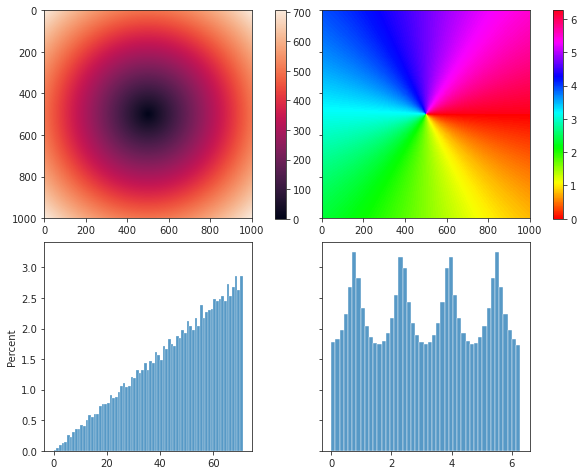

In [5]:
rho, theta = to_polar(points)

fig, axes = create_figure(2, 2, (8, 6.5), sharey='row', constrained_layout=True)
im = axes[0, 0].imshow(rho, vmin=0)
plt.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(theta, cmap='hsv', vmin=0, vmax=2*np.pi)
plt.colorbar(im, ax=axes[0, 1])

sns.histplot(rho.ravel(), stat='percent', bins=np.linspace(0, 71, 72), ax=axes[1, 0])
sns.histplot(theta.ravel(), stat='percent', bins=np.linspace(0, 2 * np.pi, 46), ax=axes[1, 1])

plt.show()

In [6]:
rho[w, w], theta[w, w]

(0.0, nan)

In [7]:
points = np.concatenate([
    points,
    np.ones((*xv.shape, 1)) * z,
], axis=-1)
points.shape

(1001, 1001, 3)

In [8]:
theta = sp_dist.cdist(
    XA=np.array(fix).reshape(1, -1),
    XB=flatten_arr(points),
    metric='cosine',
).reshape(xv.shape)

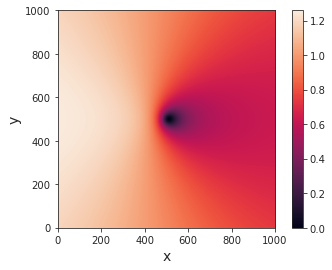

In [9]:
fig, ax = create_figure()
im = ax.imshow(theta)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.invert_yaxis()
plt.show()

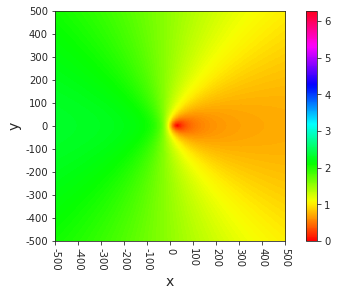

In [10]:
w = 500

x0 = 30
y0 = 0
z = 30
fix = (x0, y0, z)

linspace = np.linspace(-w, w, 2 * w + 1)
ticks, ticklabels = zip(*[
    (i, str(int(x))) for i, x in
    enumerate(linspace)
    if i % 100 == 0
])

xv, yv = np.meshgrid(*(linspace,) * 2,)
points = np.concatenate([
    np.expand_dims(xv, -1),
    np.expand_dims(yv, -1),
], axis=-1)
points = np.concatenate([
    points,
    np.ones((*xv.shape, 1)) * z,
], axis=-1)

theta = 1 - sp_dist.cdist(
    XA=np.array(fix).reshape(1, -1),
    XB=flatten_arr(points),
    metric='cosine',
).reshape(xv.shape)
theta = np.arccos(theta)

fig, ax = create_figure(figsize=(5, 4), constrained_layout=True)
im = ax.imshow(theta, cmap='hsv', vmin=0, vmax=2*np.pi)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set(
    xticks=ticks,
    yticks=ticks,
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
ax.tick_params(axis='x', rotation=-90)
ax.invert_yaxis()
plt.show()

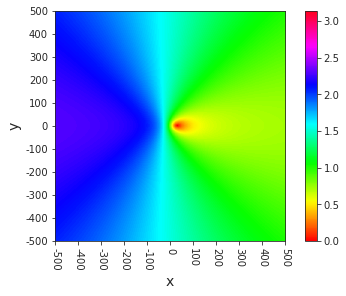

In [11]:
fig, ax = create_figure(figsize=(5, 4), constrained_layout=True)
im = ax.imshow(theta, cmap='hsv', vmin=0, vmax=np.pi)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set(
    xticks=ticks,
    yticks=ticks,
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
ax.tick_params(axis='x', rotation=-90)
ax.invert_yaxis()
plt.show()

<AxesSubplot:ylabel='Count'>

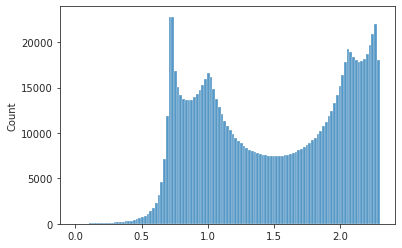

In [12]:
sns.histplot(theta.ravel())

In [13]:
np.rad2deg(np.max(theta))

131.56636963754949

In [32]:
def compute_radial_distance(
    fix: Tuple[float, float, float],
    w: int = 500, ):

    span = np.linspace(-w, w, 2 * w + 1)
    xv, yv = np.meshgrid(*(span,) * 2,)
    points = np.concatenate([
        np.expand_dims(xv, -1),
        np.expand_dims(yv, -1),
    ], axis=-1)
    points = np.concatenate([
        points,
        np.ones((*xv.shape, 1)) * fix[-1],
    ], axis=-1)
    
    theta = 1 - sp_dist.cdist(
        XA=np.array(fix).reshape(1, -1),
        XB=flatten_arr(points),
        metric='cosine',
    ).reshape(xv.shape)
    theta = np.arccos(theta)
    return theta, points, span

In [15]:
w_inf = 500

x0 = 40
y0 = 0
z = 30
fix = (x0, y0, z)

theta, points, span = compute_radial_distance(fix, w_inf)

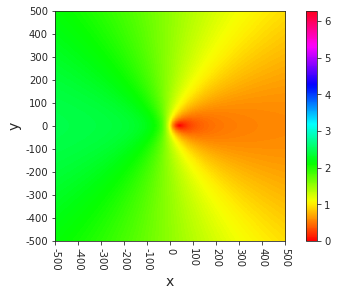

In [16]:
fig, ax = create_figure(figsize=(5, 4), constrained_layout=True)
im = ax.imshow(theta, cmap='hsv', vmin=0, vmax=2*np.pi)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ticks, ticklabels = zip(*[
    (i, str(int(x))) for i, x
    in enumerate(span)
    if i % 100 == 0
])
ax.set(
    xticks=ticks,
    yticks=ticks,
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
ax.tick_params(axis='x', rotation=-90)
ax.invert_yaxis()
plt.show()

In [17]:
w = 100
xr = range(w_inf + x0 - w, w_inf + x0 + w + 1)
yr = range(w_inf + y0 - w, w_inf + y0 + w + 1)
theta = theta[yr][:, xr]
theta.shape

(201, 201)

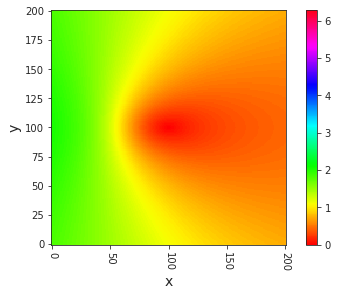

In [18]:
fig, ax = create_figure(figsize=(5, 4), constrained_layout=True)
im = ax.imshow(theta, cmap='hsv', vmin=0, vmax=2*np.pi)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.tick_params(axis='x', rotation=-90)
ax.invert_yaxis()
plt.show()

In [19]:
from skimage.transform import resize

In [20]:
aaa = resize(theta, (25,) * 2)
aaa.shape

(25, 25)

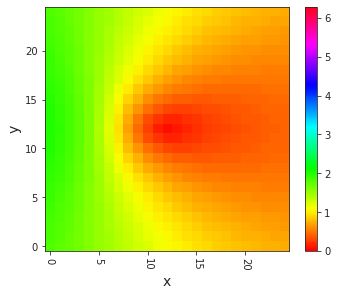

In [21]:
fig, ax = create_figure(figsize=(5, 4), constrained_layout=True)
im = ax.imshow(aaa, cmap='hsv', vmin=0, vmax=2*np.pi)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.tick_params(axis='x', rotation=-90)
ax.invert_yaxis()
plt.show()

In [22]:
theta_x = np.arctan((points[..., 0]) / points[..., 2]) - np.arctan(x0 / z)
theta_y = np.arctan((points[..., 1]) / points[..., 2]) - np.arctan(y0 / z)

<AxesSubplot:ylabel='Count'>

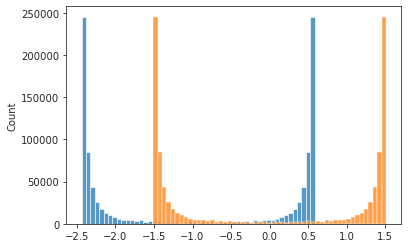

In [23]:
sns.histplot(theta_x.ravel())
sns.histplot(theta_y.ravel(), color='C1')

In [24]:
np.min(theta_x), np.max(theta_x)

(-2.4381633896753008, 0.5835729536720765)

In [25]:
np.min(theta_y), np.max(theta_y)

(-1.5108681716736887, 1.5108681716736887)

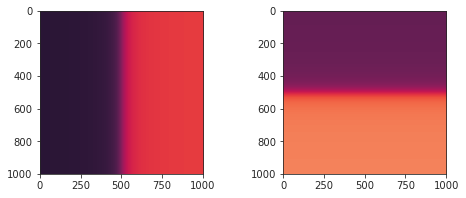

In [26]:
fig, axes = create_figure(1, 2, (8, 3))
axes[0].imshow(theta_x, vmin=-np.pi, vmax=np.pi)
axes[1].imshow(theta_y, vmin=-np.pi, vmax=np.pi)

In [27]:
theta_x = theta_x[yr][:, xr]
theta_y = theta_y[yr][:, xr]

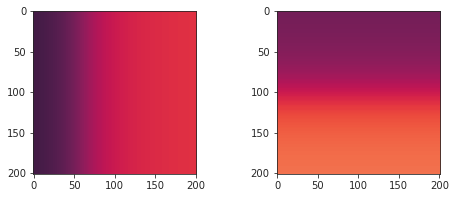

In [28]:
fig, axes = create_figure(1, 2, (8, 3))
axes[0].imshow(theta_x, vmin=-np.pi, vmax=np.pi)
axes[1].imshow(theta_y, vmin=-np.pi, vmax=np.pi)

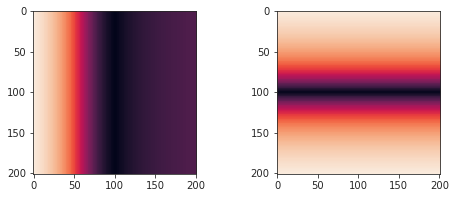

In [29]:
fig, axes = create_figure(1, 2, (8, 3))
axes[0].imshow(np.abs(theta_x))#, vmin=-np.pi, vmax=np.pi)
axes[1].imshow(np.abs(theta_y))#, vmin=-np.pi, vmax=np.pi)

In [30]:
np.rad2deg(np.arctan(x0 / z)), np.rad2deg(np.arctan(y0 / z))

(53.13010235415598, 0.0)

## Comptue $\dot{\theta}$ from linear velocities

In [46]:
def _theta_dot(points, fix, axis):
    assert axis in [0, 1]
    prod = points[..., axis] * fix[axis]
    add = points[..., axis] + fix[axis]
    sub = points[..., axis] - fix[axis]

    numin = sub * (
        np.einsum('i, jk -> ijk', velocity[:, axis], add) * fix[-1] +
        np.einsum('i, jk -> ijk', velocity[:, -1], fix[-1] ** 2 - prod)
    )
    denum = (
        (fix[-1] * sub) ** 2 +
        (fix[-1] ** 2 + prod) ** 2
    )
    return numin / np.expand_dims(denum, axis=0)

def angular_velocity(
    velocity: np.ndarray,
    fix: Tuple[float, float, float],
    w: int = 500, ):

    assert velocity.ndim == 2 and velocity.shape[1] == 3
    span = np.linspace(-w, w, 2 * w + 1)
    xv, yv = np.meshgrid(*(span,) * 2,)
    points = np.concatenate([
        np.expand_dims(xv, -1),
        np.expand_dims(yv, -1),
    ], axis=-1)
    
    vel = np.concatenate([
        np.expand_dims(_theta_dot(points, fix, 0), axis=-1),
        np.expand_dims(_theta_dot(points, fix, 1), axis=-1),
    ], axis=-1)
    return vel, points

In [47]:
w = 500

x0 = 40
y0 = 0
z = 30
fix = (x0, y0, z)
velocity = np.array([[1, 0, 2], [-1, 0, 3], [0, 0, 1], [1, 1, 1], [0, 0, 10]])

vel, points = angular_velocity(velocity, fix, w)

In [48]:
velocity.shape, vel.shape, points.shape

((5, 3), (5, 1001, 1001, 2), (1001, 1001, 2))

In [49]:
vel, points = angular_velocity(velocity, (0, 0, 20))

In [50]:
rho, theta = to_polar(vel[0])

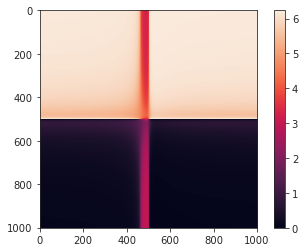

In [51]:
plt.imshow(theta)
plt.colorbar()

<AxesSubplot:ylabel='Count'>

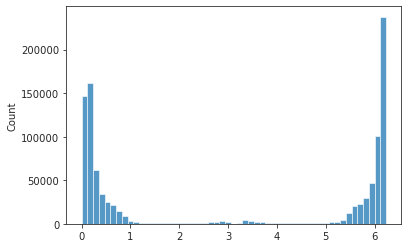

In [8]:
sns.histplot(theta.ravel())

In [15]:
np.min(vel[0][..., 0]), np.max(vel[0][..., 0])

(-0.030882352941176472, 0.08089887640449438)

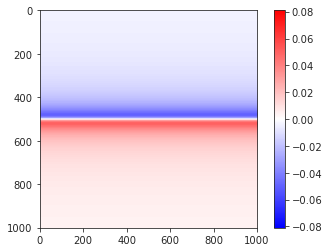

In [16]:
plt.imshow(vel[0][..., 1], vmin=-0.081, vmax=0.081, cmap='bwr')
plt.colorbar()

In [17]:
np.min(vel[0][..., 1]), np.max(vel[0][..., 1])

(-0.05, 0.05)

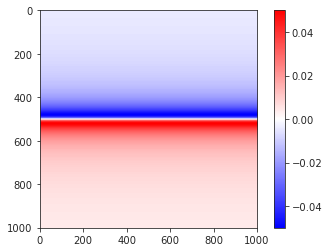

In [18]:
plt.imshow(vel[0][..., 1], vmin=-0.05, vmax=0.05, cmap='bwr')
plt.colorbar()

In [94]:
tmp_x = _theta_dot(points, fix, 0)
tmp_y = _theta_dot(points, fix, 1)

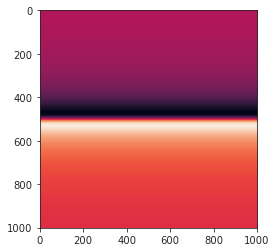

In [95]:
plt.imshow(tmp_y[0])

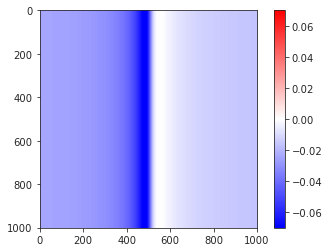

In [104]:
plt.imshow(tmp_x[0], vmin=-0.07, vmax=0.07, cmap='bwr')
plt.colorbar()

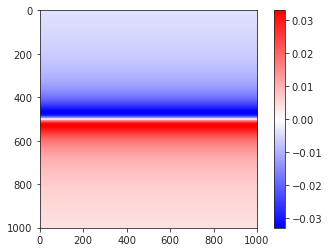

In [107]:
plt.imshow(tmp_y[0], vmin=-0.033, vmax=0.033, cmap='bwr')
plt.colorbar()

In [19]:
points.shape

(1001, 1001, 2)

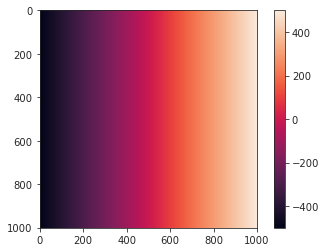

In [20]:
plt.imshow(points[..., 0])
plt.colorbar()

In [32]:
points[600, 600], points[400, 600]

(array([100., 100.]), array([ 100., -100.]))

In [33]:
vel[0][600, 600], vel[0][400, 600]

(array([0.06730769, 0.01923077]), array([ 0.06730769, -0.01923077]))

In [34]:
points[600, 600], points[600, 400]

(array([100., 100.]), array([-100.,  100.]))

In [35]:
vel[0][600, 600], vel[0][600, 400]

(array([0.06730769, 0.01923077]), array([0.02884615, 0.01923077]))

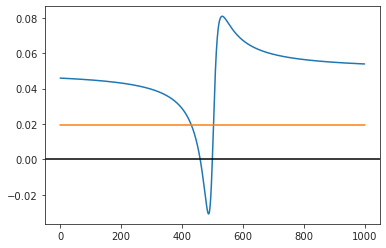

In [55]:
plt.plot(vel[0][600])
plt.axhline(0, color='k')

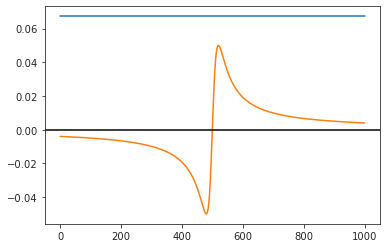

In [56]:
plt.plot(vel[0][:, 600, :])
plt.axhline(0, color='k')

## New

In [89]:
x1 = 5
y1 = 5
z = 10
vz = -1
alpha_dot_x = -x1 * vz / (z**2 + x1**2)
alpha_dot_y = -y1 * vz / (z**2 + y1**2)

alpha_dot_x, alpha_dot_y

(0.04, 0.04)

In [90]:
phi = np.arctan(np.arctan(y1/z) / np.arctan(x1/z))
rho = np.sqrt(np.arctan(y1/z) ** 2 + np.arctan(x1/z) ** 2)

rho, phi

(0.6556967368107979, 0.7853981633974483)

In [91]:
rho_dot = np.cos(phi) * alpha_dot_x + np.sin(phi) * alpha_dot_y
phi_dot = (- np.sin(phi) * alpha_dot_x + np.cos(phi) * alpha_dot_y) / rho
rho_dot, phi_dot

(0.0565685424949238, 1.0582474357973593e-17)

In [287]:
def func(x, y, z=10, vz=-1):
    alpha_dot_x = -x * vz / (z**2 + x**2)
    alpha_dot_y = -y * vz / (z**2 + y**2)
    
    arc_x = np.arctan(x/z)
    arc_y = np.arctan(y/z)
    rho = np.sqrt(arc_y**2 + arc_x**2)
    
    arc_x = np.arctan2(x, z)
    arc_y = np.arctan2(y, z)
    if arc_x < 0:
        arc_x += 2 * np.pi
    if arc_y < 0:
        arc_y += 2 * np.pi
    if arc_x != 0:
        phi = np.arctan(arc_y / arc_x)
    else:
        phi = np.pi / 2
    
    rho_dot = np.cos(phi) * alpha_dot_x + np.sin(phi) * alpha_dot_y
    if rho == 0:
        phi_dot = 0
    else:
        phi_dot = (- np.sin(phi) * alpha_dot_x + np.cos(phi) * alpha_dot_y) / rho
    
    return alpha_dot_x, alpha_dot_y, rho_dot, phi_dot, arc_x, arc_y

In [288]:
num = 50
width = 2 * num + 1
span = np.linspace(-num, num, width)

alpha_dot = np_nans((width, width, 2))
rho_dot = np_nans((width, width))
phi_dot = np_nans((width, width))
arc_x = np_nans((width, width))
arc_y = np_nans((width, width))

for i, x in enumerate(span):
    for j, y in enumerate(span):
        r = np.sqrt(x**2 + y**2)
       # if r > 15 or r < 13:
       #     continue
        a, b, c, d, e, f = func(x, y)
        alpha_dot[j, i, 0] = a
        alpha_dot[j, i, 1] = b
        rho_dot[j, i] = c
        phi_dot[j, i] = d
        arc_x[j, i] = e
        arc_y[j, i] = f

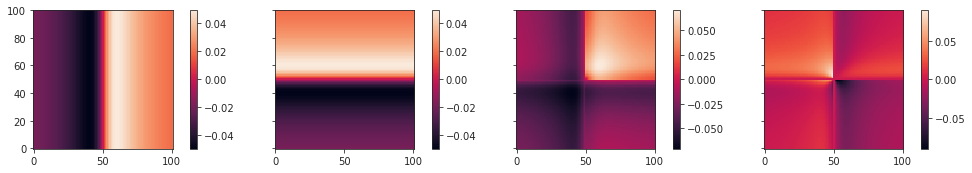

In [289]:
fig, axes = create_figure(1, 4, (13.5, 2.3), 'all', 'all', constrained_layout=True)
im = axes[0].imshow(alpha_dot[..., 0])
plt.colorbar(im, ax=axes[0])

im = axes[1].imshow(alpha_dot[..., 1])
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(rho_dot)
plt.colorbar(im, ax=axes[2])

im = axes[3].imshow(phi_dot)
plt.colorbar(im, ax=axes[3])

axes[-1].invert_yaxis()

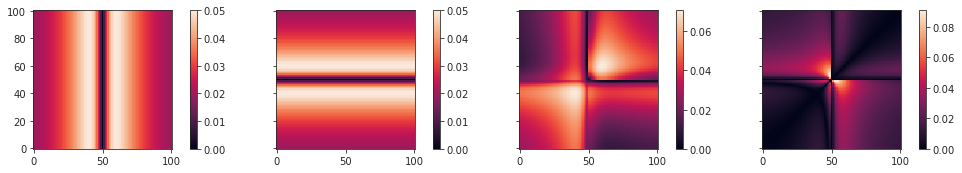

In [290]:
fig, axes = create_figure(1, 4, (13.5, 2.3), 'all', 'all', constrained_layout=True)
im = axes[0].imshow(np.abs(alpha_dot[..., 0]))
plt.colorbar(im, ax=axes[0])

im = axes[1].imshow(np.abs(alpha_dot[..., 1]))
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(np.abs(rho_dot))
plt.colorbar(im, ax=axes[2])

im = axes[3].imshow(np.abs(phi_dot))
plt.colorbar(im, ax=axes[3])

axes[-1].invert_yaxis()

In [173]:
phi_dot[50-2:50+2, 50]

array([-5.96540773e-18, -6.08276300e-18,  0.00000000e+00,  6.08276300e-18])

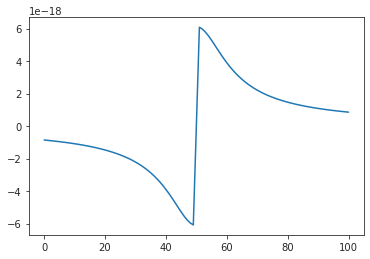

In [175]:
plt.plot(phi_dot[:, 50])

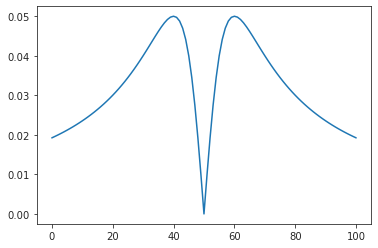

In [177]:
plt.plot(np.abs(rho_dot[:, 50]))

## On the way to working

In [301]:
x = 7
y = 4
z = 10
arc_x = np.arctan(abs(x)/z)
arc_y = np.arctan(abs(y)/z)

rho = np.sqrt(arc_x**2 + arc_y**2)
phi = np.arctan2(arc_y * np.sign(y), arc_x * np.sign(x))
rho, phi, np.rad2deg(phi)

(0.7195632749121554, 0.5571882488305245, 31.924535052274184)

In [302]:
x = -7
y = 4
z = 10
arc_x = np.arctan(abs(x)/z)
arc_y = np.arctan(abs(y)/z)

rho = np.sqrt(arc_x**2 + arc_y**2)
phi = np.arctan2(arc_y * np.sign(y), arc_x * np.sign(x))
rho, phi, np.rad2deg(phi)

(0.7195632749121554, 2.5844044047592685, 148.0754649477258)

## Finally, working

In [3]:
def func(x, y, z=10, vz=-1):
    alpha_dot_x = -x * vz / (z**2 + x**2)
    alpha_dot_y = -y * vz / (z**2 + y**2)
    
    arc_x = np.arctan(abs(x)/z)
    arc_y = np.arctan(abs(y)/z)
    rho = np.sqrt(arc_y**2 + arc_x**2)
    phi = np.arctan2(arc_y * np.sign(y), arc_x * np.sign(x))
    if phi < 0:
        phi += 2 * np.pi
    rho_dot = np.cos(phi) * alpha_dot_x + np.sin(phi) * alpha_dot_y
    if rho == 0:
        phi_dot = 0
    else:
        phi_dot = (- np.sin(phi) * alpha_dot_x + np.cos(phi) * alpha_dot_y) / rho
    output = {
        'alpha_dot_x': alpha_dot_x,
        'alpha_dot_y': alpha_dot_y,
        'rho_dot': rho_dot,
        'phi_dot': phi_dot,
        'arc_x': arc_x,
        'arc_y': arc_y,
        'rho': rho,
        'phi': phi,
    }
    return output

In [4]:
num = 50
width = 2 * num + 1
span = np.linspace(-num, num, width)

alpha_dot = np_nans((width, width, 2))
rho_dot = np_nans((width, width))
phi_dot = np_nans((width, width))
arc_x = np_nans((width, width))
arc_y = np_nans((width, width))
rho = np_nans((width, width))
phi = np_nans((width, width))

for i, x in enumerate(span):
    for j, y in enumerate(span):
        output = func(x, y)
        alpha_dot[j, i, 0] = output['alpha_dot_x']
        alpha_dot[j, i, 1] = output['alpha_dot_y']
        rho_dot[j, i] = output['rho_dot']
        phi_dot[j, i] = output['phi_dot']
        arc_x[j, i] = output['arc_x']
        arc_y[j, i] = output['arc_y']
        rho[j, i] = output['rho']
        phi[j, i] = output['phi']

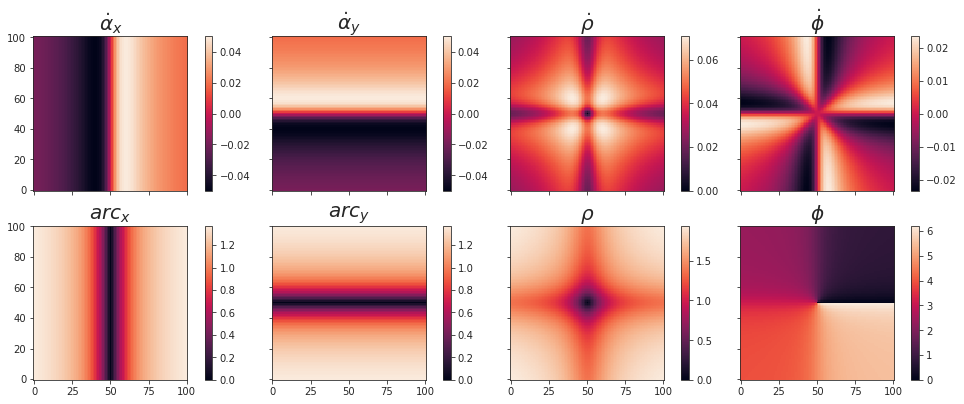

In [5]:
_show1()

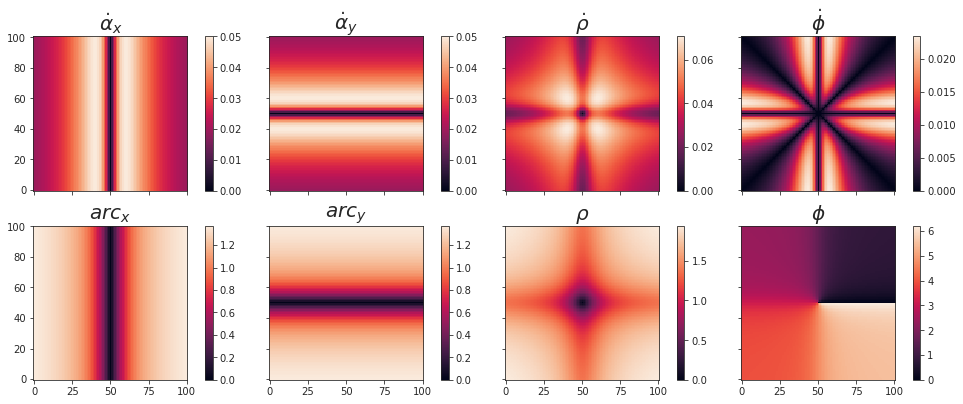

In [6]:
_show1(True)

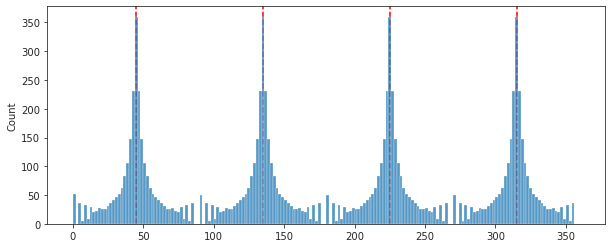

In [7]:
fig, ax = create_figure(figsize=(10, 4))
ax.axvline(45, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
ax.axvline(45 + 90, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
ax.axvline(45 + 180, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
ax.axvline(360 - 45, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
sns.histplot(np.rad2deg(phi.ravel()), bins=np.linspace(0, 360, 181), ax=ax, zorder=2)
plt.show()

### Change z (zoom out)

In [8]:
num = 50
width = 2 * num + 1
span = np.linspace(-num, num, width)

alpha_dot = np_nans((width, width, 2))
rho_dot = np_nans((width, width))
phi_dot = np_nans((width, width))
arc_x = np_nans((width, width))
arc_y = np_nans((width, width))
rho = np_nans((width, width))
phi = np_nans((width, width))

for i, x in enumerate(span):
    for j, y in enumerate(span):
        output = func(x, y, 1000)
        alpha_dot[j, i, 0] = output['alpha_dot_x']
        alpha_dot[j, i, 1] = output['alpha_dot_y']
        rho_dot[j, i] = output['rho_dot']
        phi_dot[j, i] = output['phi_dot']
        arc_x[j, i] = output['arc_x']
        arc_y[j, i] = output['arc_y']
        rho[j, i] = output['rho']
        phi[j, i] = output['phi']

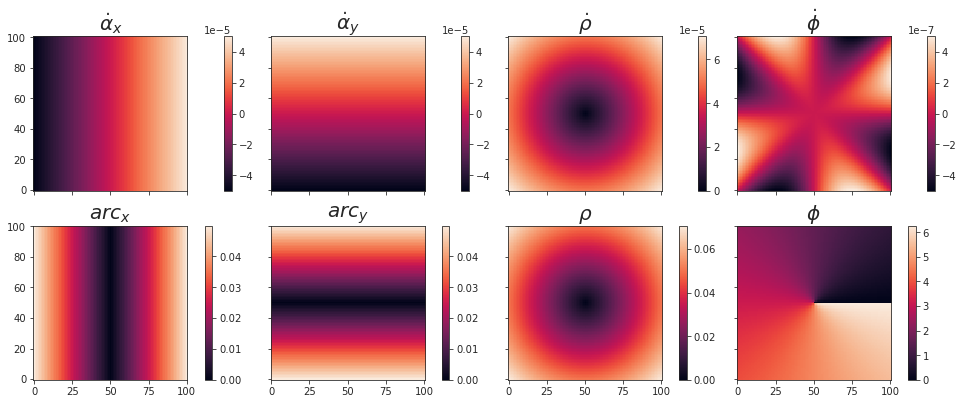

In [9]:
_show1()

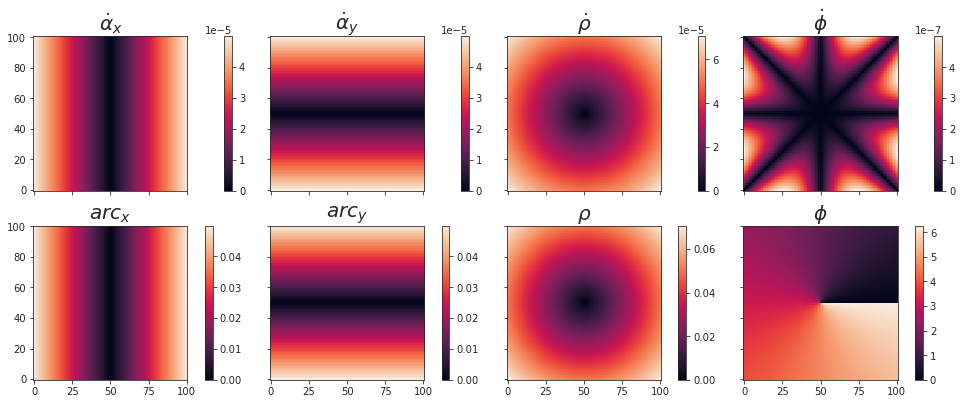

In [10]:
_show1(True)

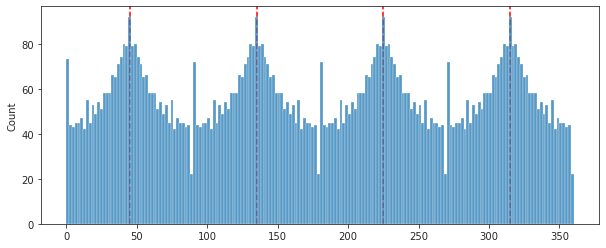

In [11]:
fig, ax = create_figure(figsize=(10, 4))
ax.axvline(45, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
ax.axvline(45 + 90, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
ax.axvline(45 + 180, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
ax.axvline(360 - 45, ls='--', color='r', lw=1.5, zorder=0, alpha=1)
sns.histplot(np.rad2deg(phi.ravel()), bins=np.linspace(0, 360, 181), ax=ax, zorder=2)
plt.show()

## Show velocity field (optical flow)

In [77]:
num = 50
width = 2 * num + 1
span = np.linspace(-num, num, width)

alpha_dot = np_nans((width, width, 2))
for i, x in enumerate(span):
    for j, y in enumerate(span):
        output = func(x, y)
        alpha_dot[j, i, 0] = output['alpha_dot_x']
        alpha_dot[j, i, 1] = output['alpha_dot_y']

In [81]:
w = 20
xr = range(num-w, num+w+1)

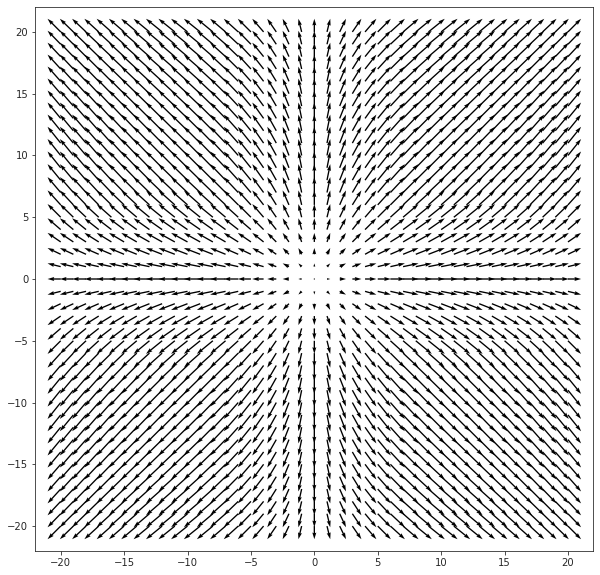

In [82]:
fig, ax = create_figure(figsize=(10, 10))
ax.quiver(
    span[xr],
    span[xr],
    alpha_dot[xr][:, xr][..., 0],
    alpha_dot[xr][:, xr][..., 1],
    scale=1.7,
)

In [83]:
from skimage.transform import resize

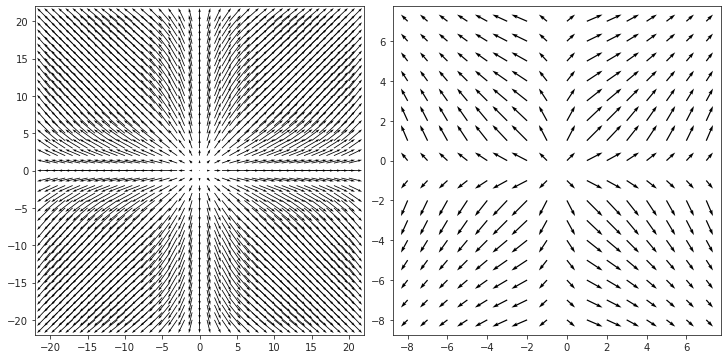

In [108]:
fig, axes = create_figure(1, 2, (10, 5), constrained_layout=True)
axes[0].quiver(
    span[xr],
    span[xr],
    alpha_dot[xr][:, xr][..., 0],
    alpha_dot[xr][:, xr][..., 1],
    scale=1,
)
axes[1].quiver(
    range(-8, 8),
    range(-8, 8),
    resize(alpha_dot[..., 0], (16,) * 2),
    resize(alpha_dot[..., 1], (16,) * 2),
    scale=1,
)
ax_square(axes)
plt.show()

### Allow more width

In [109]:
w = 32
xr = range(num-w, num+w+1)

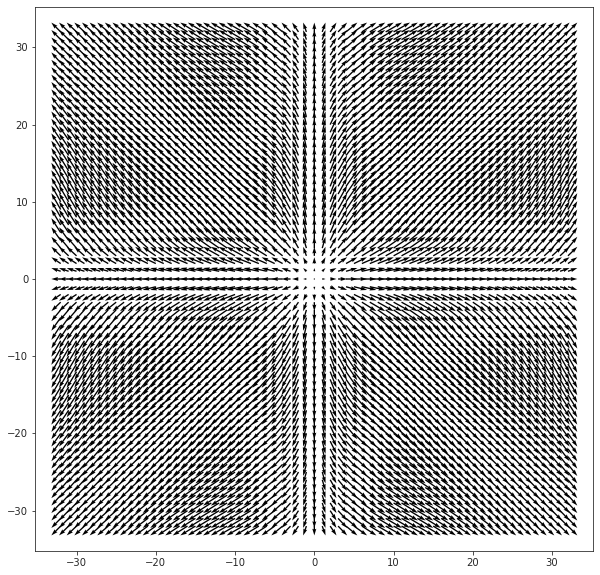

In [110]:
fig, ax = create_figure(figsize=(10, 10))
ax.quiver(
    span[xr],
    span[xr],
    alpha_dot[xr][:, xr][..., 0],
    alpha_dot[xr][:, xr][..., 1],
    scale=1.7,
)

In [111]:
from skimage.transform import resize

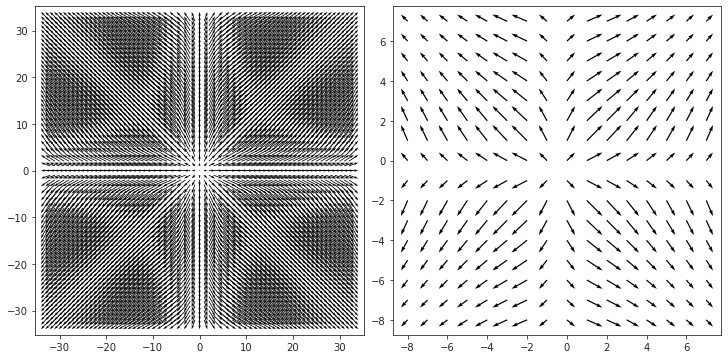

In [114]:
fig, axes = create_figure(1, 2, (10, 5), constrained_layout=True)
axes[0].quiver(
    span[xr],
    span[xr],
    alpha_dot[xr][:, xr][..., 0],
    alpha_dot[xr][:, xr][..., 1],
    scale=1,
)
axes[1].quiver(
    range(-8, 8),
    range(-8, 8),
    resize(alpha_dot[..., 0], (16,) * 2),
    resize(alpha_dot[..., 1], (16,) * 2),
    scale=1,
)
ax_square(axes)
plt.show()